# Loan Default 



SuperLender is a local digital lending company, which prides itself in its effective use of credit risk models to deliver profitable and high-impact loan alternative. Its assessment approach is based on two main risk drivers of loan default prediction:.
- 1) willingness to pay and 
- 2) ability to pay. Since not all customers pay back, the company invests in experienced data scientist to build robust models to effectively predict the odds of repayment.

These two fundamental drivers need to be determined at the point of each application to allow the credit grantor to make a calculated decision based on repayment odds, which in turn determines if an applicant should get a loan, and if so - what the size, price and tenure of the offer will be.

There are two types of risk models in general: New business risk, which would be used to assess the risk of application(s) associated with the first loan that he/she applies. The second is a repeat or behaviour risk model, in which case the customer has been a client and applies for a repeat loan. In the latter case - we will have additional performance on how he/she repaid their prior loans, which we can incorporate into our risk model.

**It is your job to predict if a loan was good or bad, i.e. accurately predict binary outcome variable, where Good is 0 and Bad is 1.**


### 1.2 Description of the data

There are 3 different datasets for both train and test

#### 1.2.1 Demographic data (traindemographics.csv)
- customerid (Primary key used to merge to other data)
- birthdate (date of birth of the customer)
- bank_account_type (type of primary bank account)
- longitude_gps
- latitude_gps
- bank_name_clients (name of the bank)
- bank_branch_clients (location of the branch - not compulsory - so missing in a lot of the cases)
- employment_status_clients (type of employment that customer has)
- level_of_education_clients (highest level of education)

#### 1.2.2 Performance data (trainperf.csv) : 
This is the repeat loan that the customer has taken for which we need to predict the performance of. Basically, we need to predict if whether this loan would default given all previous loans and demographics of a customer.
- customerid (Primary key used to merge to other data)
- systemloanid (The id associated with the particular loan. The same customerId can have multiple systemloanid’s for each loan he/she has taken out)
- loannumber (The number of the loan that you have to predict)
- approveddate (Date that loan was approved)
- creationdate (Date that loan application was created)
- loanamount (Loan value taken)
- totaldue (Total repayment required to settle the loan - this is the capital loan value disbursed +interest and fees)
- termdays (Term of loan)
- referredby (customerId of the customer that referred this person - is missing, then not referred)
- good_bad_flag (good = settled loan on time; bad = did not settled loan on time) - this is the target variable that we need to predic

#### 1.2.3 Previous loans data (trainprevloans.csv) : 
This dataset contains all previous loans that the customer had prior to the loan above that we want to predict the performance of. Each loan will have a different systemloanid, but the same customerid for each customer.

- customerid (Primary key used to merge to other data)
- systemloanid (The id associated with the particular loan. The same customerId can have multiple systemloanid’s for each loan he/she has taken out)
- loannumber (The number of the loan that you have to predict)
- approveddate (Date that loan was approved)
- creationdate (Date that loan application was created)
- loanamount (Date that loan application was created)
- totaldue (Total repayment required to settle the loan - this is the capital loan value disbursed +interest and fees) termdays (Term of loan)
- closeddate (Date that the loan was settled)
- referredby (customerId of the customer that referred this person - is missing, then not refrerred)
- firstduedate (Date of first payment due in cases where the term is longer than 30 days. So in the case where the term is 60+ days - then there are multiple monthly payments due - and this dates reflects the date of the first payment)
- firstrepaiddate (Actual date that he/she paid the first payment as defined above)




## Confusion Matrix for the problem statement:

<img src='con matrix.jpg'/>

**For our loan default problem:**

**Precision:** Out of all the predicted customers as bad customers, what is the proportion that is actually bad?<br>
**Recall:** Out of all the actual bad customers, what is the proportion that is predicted correctly?

## Pre-Processing

**Importing Libraries**

In [164]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_recall_curve, log_loss, roc_curve, auc,log_loss,confusion_matrix,plot_confusion_matrix,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier

import warnings
warnings.filterwarnings('ignore')

**Importing Libraries**

In [44]:
data = pd.read_csv('Loan data cleaned.csv')
data.head()

,loannumber,loanamount,totaldue,termdays,good_bad_flag,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,...,ploan_additional charges_50%_x,ploan_additional charges_75%_x,ploan_additional charges_max_x,ploan_additional charges_mean_y,ploan_additional charges_min_y,ploan_additional charges_25%_y,ploan_additional charges_50%_y,ploan_additional charges_75%_y,ploan_additional charges_max_y,not_repaid_percentage
0,12,30000.0,34500.0,30,Good,Other,3.432010,6.433055,Diamond Bank,Permanent,...,3800.000000,4500.000000,4500.000000,3900.000000,3000.000000,3400.000000,3800.000000,4500.000000,4500.000000,64.000000
1,2,15000.0,17250.0,30,Good,Savings,3.885298,7.320700,GT Bank,Permanent,...,2665.558293,3037.525723,3543.851778,2730.359972,2102.661161,2364.738902,2665.558293,3037.525723,3543.851778,63.573297
2,7,20000.0,22250.0,15,Good,Other,11.139350,10.292041,EcoBank,Permanent,...,1500.000000,1500.000000,3000.000000,1750.000000,1500.000000,1500.000000,1500.000000,1500.000000,3000.000000,50.000000
3,3,10000.0,11500.0,15,Good,Savings,3.985770,7.491708,First Bank,Permanent,...,2250.000000,2625.000000,3000.000000,2250.000000,1500.000000,1875.000000,2250.000000,2625.000000,3000.000000,0.000000
4,9,40000.0,44000.0,30,Good,Other,7.457913,9.076574,GT Bank,Permanent,...,3800.000000,5100.000000,9000.000000,4800.000000,3000.000000,3000.000000,3800.000000,5100.000000,9000.000000,100.000000


#### Checking the dtypes 

In [45]:
for i in data.columns:
    print(i,'\t',data[i].dtype)

loannumber 	 int64
loanamount 	 float64
totaldue 	 float64
termdays 	 int64
good_bad_flag 	 object
bank_account_type 	 object
longitude_gps 	 float64
latitude_gps 	 float64
bank_name_clients 	 object
employment_status_clients 	 object
approval_time 	 float64
creationdate_dow 	 int64
additional_charges 	 float64
is_referred 	 int64
age 	 float64
ploan_loanamount_mean 	 float64
ploan_loanamount_min 	 float64
ploan_loanamount_25% 	 float64
ploan_loanamount_50% 	 float64
ploan_loanamount_75% 	 float64
ploan_loanamount_max 	 float64
ploan_totaldue_mean 	 float64
ploan_totaldue_min 	 float64
ploan_totaldue_25% 	 float64
ploan_totaldue_50% 	 float64
ploan_totaldue_75% 	 float64
ploan_totaldue_max 	 float64
ploan_termdays_mean 	 float64
ploan_termdays_min 	 float64
ploan_termdays_25% 	 float64
ploan_termdays_50% 	 float64
ploan_termdays_75% 	 float64
ploan_termdays_max 	 float64
ploan_approval_time_mean 	 float64
ploan_approval_time_min 	 float64
ploan_approval_time_25% 	 float64
ploan_approva

* Most of the variables are float and int type.
* There are few variables that are object type, need to encode them before modeling.

**Checking for null values** 

In [46]:
data.isnull().sum().sum()

0

* No null values. The data is clean.

**Creating dummy variables for categorical Variables**
<br><br>We can't directly use categorical variables in most of the machine learning algorithems. So we need to encode the categories and convert them to numeric or binary form. For ordinal variables we can directly convert the categories as per there order using label encoding but for nominal data if we use the same method then we are providing algorithem that there is a pattern of order in the nominal categories(which isn't the case). To over come this problem we need to convert these categories to a respective binary form either using pandas dummy variable or sklearns 1-hot encoding. 

**List of categories we are converting to 1-hot ecoding:**
<br>creationdate_dow<br>bank_account_type<br>bank_name_clients<br>employment_status_clients

In [47]:
data = pd.get_dummies(data=data, columns=['creationdate_dow','bank_account_type', 'bank_name_clients', 'employment_status_clients'], drop_first=True)
data.head()

,loannumber,loanamount,totaldue,termdays,good_bad_flag,longitude_gps,latitude_gps,approval_time,additional_charges,is_referred,...,bank_name_clients_Skye Bank,bank_name_clients_Stanbic IBTC,bank_name_clients_Standard Chartered,bank_name_clients_Sterling Bank,bank_name_clients_UBA,bank_name_clients_Union Bank,bank_name_clients_Unity Bank,bank_name_clients_Wema Bank,bank_name_clients_Zenith Bank,employment_status_clients_Permanent
0,12,30000.0,34500.0,30,Good,3.432010,6.433055,1.00,4500.0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,15000.0,17250.0,30,Good,3.885298,7.320700,1.01,2250.0,0,...,0,0,0,0,0,0,0,0,0,1
2,7,20000.0,22250.0,15,Good,11.139350,10.292041,1.00,2250.0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,10000.0,11500.0,15,Good,3.985770,7.491708,1.00,1500.0,0,...,0,0,0,0,0,0,0,0,0,1
4,9,40000.0,44000.0,30,Good,7.457913,9.076574,1.00,4000.0,0,...,0,0,0,0,0,0,0,0,0,1


**Distribution of target(good_bad_flag)**

In [48]:
data['good_bad_flag'].value_counts()/len(data['good_bad_flag'])*100

Good    78.205128
Bad     21.794872
Name: good_bad_flag, dtype: float64

**Dividing the data to train and test**

In [49]:
x = data.drop('good_bad_flag', axis=1)
y = data['good_bad_flag'].replace({'Good': 0, 'Bad': 1})

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=101, test_size=0.25, stratify = y)

**Note:** For our target variable good_bad_flag, If the person is bad(Not repaid the loan) we are considering it as class 1 and if the person is good(repaid the loan) then it falls under class 0.

#### Standardizing train and test data

In [50]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns)

x_test_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(x_test_scaled, columns=x_test.columns)

## Logistic Regression

### Logistic Regression(with balanced class weights)

In [51]:
def Prob_thresh(arr, thresh):
    
    #creating a dataframe for the probabilty column 
    prob_frame = pd.DataFrame(data=arr, columns=['Prob 0', 'Prob 1'])
    prob_frame['Pred_val'] = prob_frame['Prob 1'].apply(lambda x: 1 if x>thresh else 0)
    
    return prob_frame['Pred_val']

In [209]:
def Model_Prediction(x_train, y_train, x_test, y_test, model=LogisticRegression(),
                     thresh=None, roc_curve=False, report=True, p_r_curve=False, con_mat=False):
    
    """
    Function that takes in train, test data and model and prints the f1 score for both training and testing set.
    """
    
    # Defining the model 
    logreg = model
    
    # training the model 
    logreg.fit(x_train, y_train)
    
    if thresh == None:
        
        #Predicting on train and test data
        train_pred = logreg.predict(x_train)
        test_pred = logreg.predict(x_test)
        
        #Predicting the probabilities of train and test
        #train_prob = logreg.predict_proba(x_train)
        #test_prob = logreg.predict_proba(x_test)
        
    else:
        
        #Predicting the probabilities of train and test
        train_prob = logreg.predict_proba(x_train)
        test_prob = logreg.predict_proba(x_test)
        
        #Predicting on train and test using optimal threshold
        train_pred = Prob_thresh(train_prob, thresh)
        test_pred = Prob_thresh(test_prob, thresh)
        
        
    #Checking f1 scores for train and test data
    train_f1 = f1_score(train_pred, y_train)
    test_f1 = f1_score(test_pred, y_test)
    
    if report == True:
        
        #Printing the train and test scores
        print('Training f1 score:', train_f1)
        print('Testing f1 score:', test_f1)
        print('\t')
        print('\033[1mClassification Report for test data:\033[0m')
        print(classification_report(test_pred, y_test))
        
    if con_mat == True:
        plt.figure(figsize=(2,2))
        sns.set_style('white')
        plot_confusion_matrix(logreg, x_test, y_test, values_format='d', display_labels=['Good', 'Bad'], cmap=plt.cm.Blues)
    
    if p_r_curve == True: 
        
        #Ploting the precision-recall curve
        precision, recall, thresholds = precision_recall_curve(y_test, test_prob[:,1])
    
        plt.figure(figsize=(6,5), dpi=100)
        sns.set_style('whitegrid')
        plt.plot(thresholds, precision[:-1], color='green', label='Precision Curve')
        plt.plot(thresholds, recall[:-1], color='orange', label='Recall Curve')
        plt.xlabel('Threshold Points')
        plt.ylabel('F1-Score')
        plt.title('Precision-Recall tradeoff')
        plt.legend()
        
    if roc_curve == True:
        
        fpr, tpr, thresholds = roc_curve(y_test, test_prob[:,1])
        auc_model = auc(fpr, tpr)
        
        plt.figure(figsize=(6, 5), dpi=100)
        plt.plot(fpr, tpr, marker='.', label='(auc = %0.3f)' % auc_model)
        plt.plot([0,1], [0,1], label= 'baseline', color= 'red')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC-AUC Curve')
        plt.legend()

    return train_pred, test_pred, logreg
    

In [54]:
coef, lr_train_pred, lr_test_pred, logreg = Model_Prediction(x_train, y_train, x_test, y_test,\
                                                     model=LogisticRegression(class_weight='balanced',penalty='none'))

Training f1 score: 0.4751269035532995
Testing f1 score: 0.4338461538461539
	
Classification Report for test data:
              precision    recall  f1-score   support

           0       0.68      0.86      0.76       680
           1       0.59      0.34      0.43       412

    accuracy                           0.66      1092
   macro avg       0.64      0.60      0.60      1092
weighted avg       0.65      0.66      0.64      1092



**Observations:**
* Training score is slightly higher than the testing score. This signifies the presence of overfitting but not much.
* Through the classification report we can infer that the model is performing significantly well on 0 class but not as good for class 1.
* For class 1 i.e. the bad customers, the recall is very low. This signifies that the model is not able to detect the people that are actually bad and our model is suggesting they are good.


In [12]:
#Checking minimum, maximum and mean values for coeficients
coef.min(), coef.max(), coef.mean()

(-0.7365518967642615, 1.1431723759123682, -0.02377947731611422)

In [13]:
def Coef_plot(x_train, coef, low=-0.2, high=0.2):

    #Dataframe for coeficient values and variable names
    Coefficients = pd.DataFrame({'Variable': x_train.columns,'coefficient' : coef.reshape(-1)})
    
    #Filtering values that are very small
    Coefficients_filter = Coefficients[(Coefficients['coefficient'] < -0.2) | (Coefficients['coefficient'] > 0.2)]
    Coefficients_filter = Coefficients_filter.sort_values(by='coefficient', ascending=False)
    
    #Ploting the filtered coeficients
    plt.figure(figsize=(12, 4), dpi=120, facecolor='w', edgecolor='b')
    plt.bar(Coefficients_filter['Variable'], Coefficients_filter['coefficient'])
    plt.xlabel( "Variables")
    plt.ylabel('Coefficients')
    plt.title('Coefficient plot')
    plt.xticks(rotation = 90)
    plt.show()


**Ploting the coefficients**

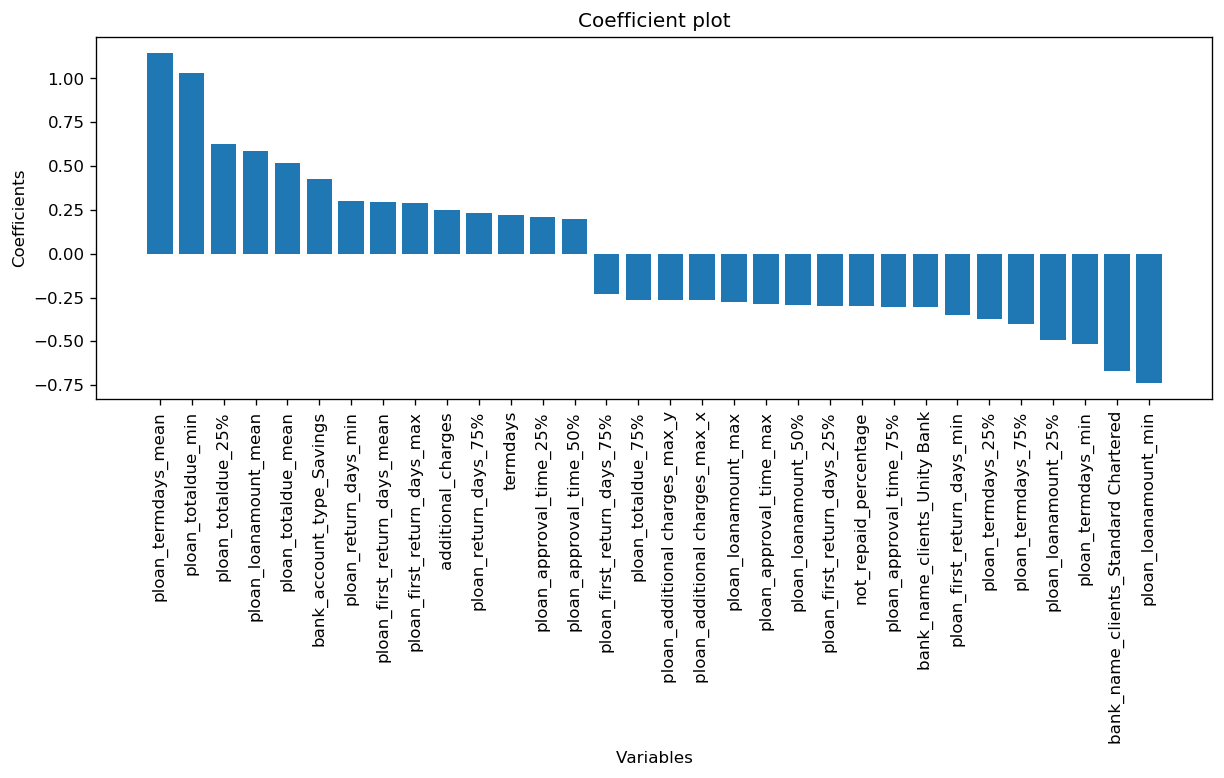

In [14]:
Coef_plot(x_train, coef)

**Observations:**
* Values of coefficients is not very high(between the range -0.8 to 1.15).
* ploan_termdays_mean has the highest cofficents values(1.14318).
* Adding l2 penalty won't be very useful in this case. As the coeffient values is already very low and overfitting is very low.
* But we'll still try and check what difference it makes to the model performance.
* Using l1 penalty would be useful in this case. As it will nulify the affect of variables whose coeficients are very low.

### Logestic Regression(Ridge Penalty)

In [15]:
# Setting the C value 
C_ridge = [10e10,10e8,10e4,1000,100,10,1,0.1,0.001,0.0001]

#Initialize the dataframe for storing scores and coefficients.
col = ['train_f1','test_f1']
ind = ['C_%.2g'%C_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

In [16]:
# Generic function to perform ridge regression, visualizing it and getting the residuals 
def Ridge_reg(x_train, y_train, x_test, y_test, c):
    
    #Fitting the model 
    logit_reg = LogisticRegression(class_weight='balanced', C=c, penalty='l2')
    logit_reg.fit(x_train,y_train)
    pred_train = logit_reg.predict(x_train)
    pred_test = logit_reg.predict(x_test)
    
    
    #Return the result in pre-defined format
    train_f1 = f1_score(y_train, pred_train)
    ret = [train_f1]
    
    test_f1 = f1_score(y_test, pred_test)
    ret.extend([test_f1])
    
    return ret

for i in range(10):
    coef_matrix_ridge.iloc[i,] = Ridge_reg(x_train, y_train, x_test, y_test, C_ridge[i])
    
coef_matrix_ridge

,train_f1,test_f1
C_1e+11,0.475127,0.433846
C_1e+09,0.475368,0.433846
C_1e+05,0.472932,0.435583
C_1e+03,0.475025,0.427692
C_1e+02,0.477354,0.438356
C_10,0.473228,0.432515
C_1,0.472393,0.427692
C_0.1,0.471134,0.422665
C_0.001,0.45932,0.433697
C_0.0001,0.44246,0.406202


**Obsevations:**
* We are mostly getting similar score values for train and test with different penalty values.
* Chosing C=1 as the final model for logistic ridge regression model as it has the most testing score. 

In [17]:
coef, lr_train_pred, lr_test_pred = Model_Prediction(x_train, y_train, x_test, y_test, model=LogisticRegression(class_weight='balanced', C=100))

Training f1 score: 0.47735368956743
Testing f1 score: 0.4383561643835617
	
Classification Report for test data:
              precision    recall  f1-score   support

           0       0.68      0.86      0.76       673
           1       0.61      0.34      0.44       419

    accuracy                           0.66      1092
   macro avg       0.64      0.60      0.60      1092
weighted avg       0.65      0.66      0.64      1092



**Observations:**
* Similar as the normal logestic regression with little improvement in f1 socre.

#### Plotting the coefficients

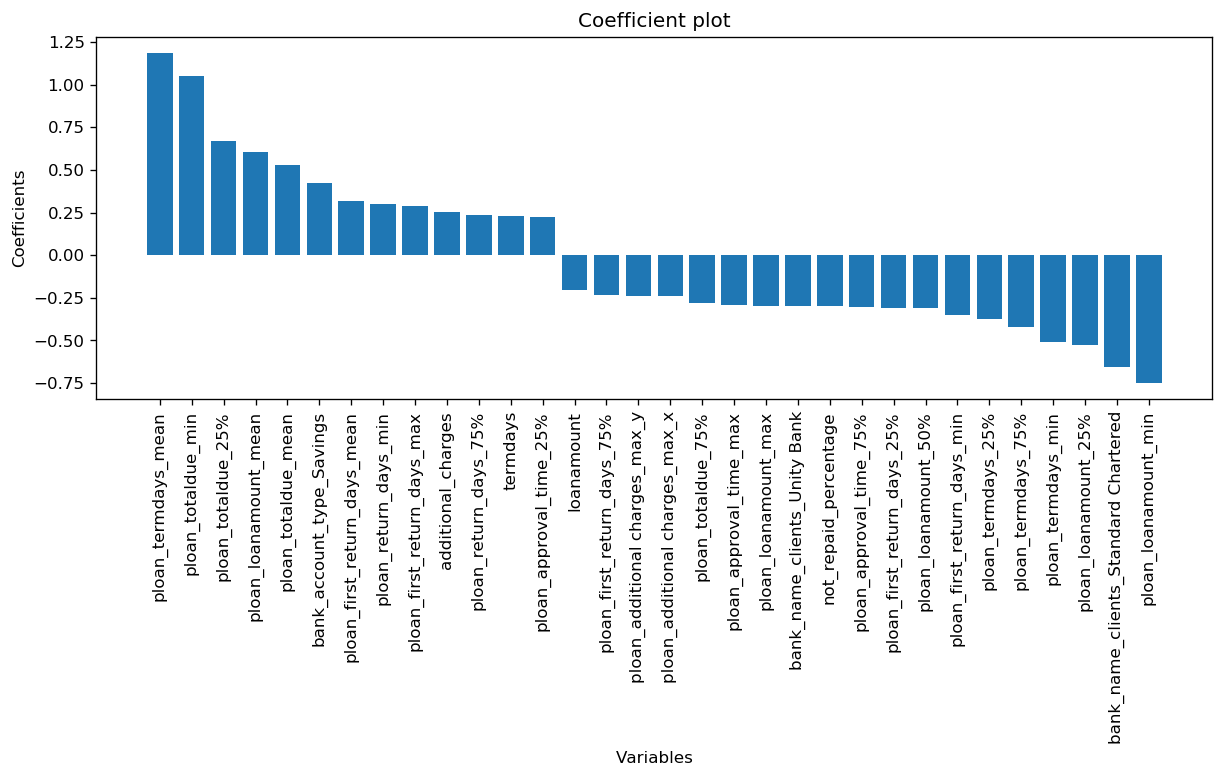

In [18]:
Coef_plot(x_train, coef)

**Observations:**
* There is not much difference between significance level of variables just the magnitude has been reduced a bit.    

### Logistic Regression(Lasso Penatly)

In [19]:
# Setting the C value 
C_lasso = [10e10,10e8,10e4,1000,100,10,1,0.1,0.001,0.0001]

#Initialize the dataframe for storing scores and coefficients.
col = ['train_f1','test_f1']
ind = ['C_%.2g'%C_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

In [20]:
# Generic function to perform ridge regression, visualizing it and getting the residuals 
def Lasso_reg(x_train, y_train, x_test, y_test, c):
    
    #Fitting the model 
    logit_reg = LogisticRegression(class_weight='balanced', C=c, penalty='l1', solver='liblinear')
    logit_reg.fit(x_train,y_train)
    pred_train = logit_reg.predict(x_train)
    pred_test = logit_reg.predict(x_test)
    
    
    #Return the result in pre-defined format
    train_f1 = f1_score(y_train, pred_train)
    ret = [train_f1]
    
    test_f1 = f1_score(y_test, pred_test)
    ret.extend([test_f1])
    
    return ret

for i in range(10):
    coef_matrix_lasso.iloc[i,] = Lasso_reg(x_train, y_train, x_test, y_test, C_lasso[i])
    
coef_matrix_lasso

,train_f1,test_f1
C_1e+11,0.472746,0.431853
C_1e+09,0.472746,0.433588
C_1e+05,0.472505,0.434251
C_1e+03,0.473228,0.431193
C_1e+02,0.473228,0.434251
C_10,0.47269,0.431853
C_1,0.470046,0.430341
C_0.1,0.46622,0.423313
C_0.001,0,0
C_0.0001,0,0


* Choosing C=1 as the penality for the ridge penality.

In [21]:
coef, lr_train_pred, lr_test_pred = Model_Prediction(x_train, y_train, x_test, y_test,\
                                                     model=LogisticRegression(class_weight='balanced', penalty='l1', C=1, solver='liblinear'))

Training f1 score: 0.47028688524590156
Testing f1 score: 0.43034055727554177
	
Classification Report for test data:
              precision    recall  f1-score   support

           0       0.69      0.86      0.76       684
           1       0.58      0.34      0.43       408

    accuracy                           0.66      1092
   macro avg       0.63      0.60      0.60      1092
weighted avg       0.65      0.66      0.64      1092



**Observations:**
* Again, there is no improvement in the f1 score, precision and recall.
* But using the lasso penality, many irrelevant variables got nulified. 

#### Plotting the coefficents

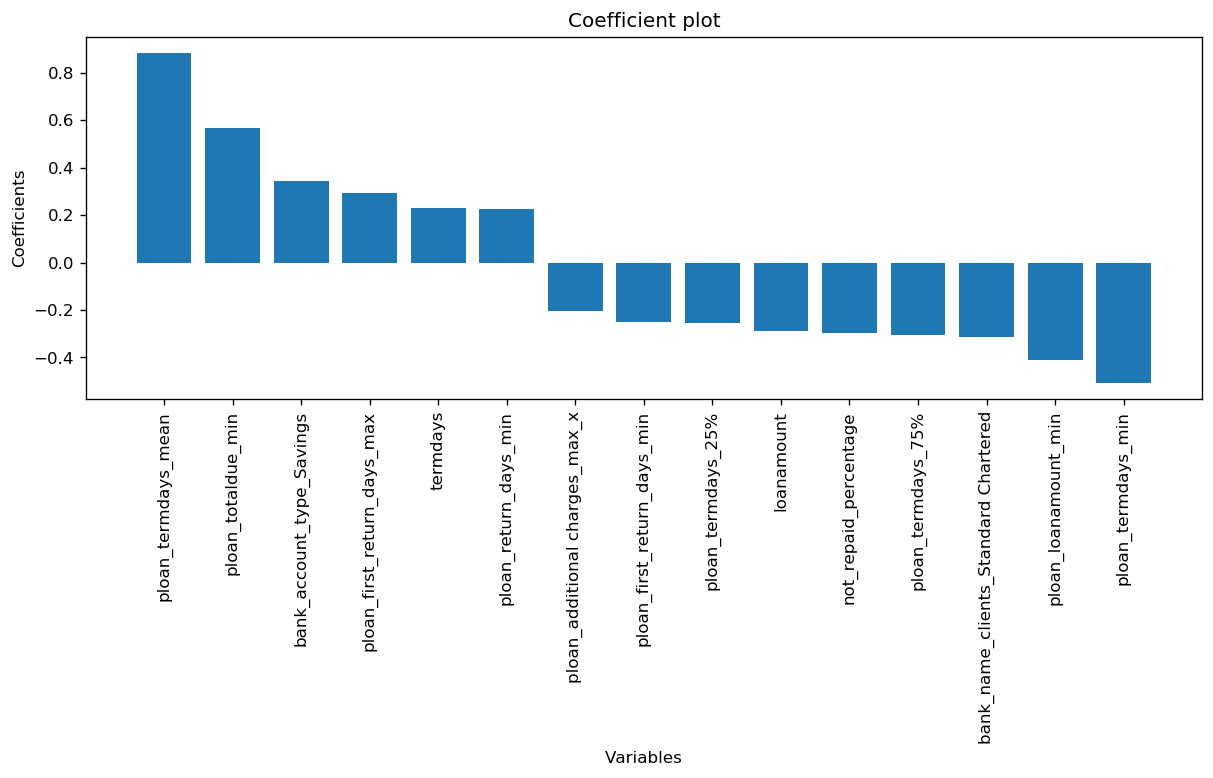

In [22]:
Coef_plot(x_train, coef)

**Observation:**
* The magnitude and significance of the variables remained same.
* Some of the variable's significance level got nullied. 

In [23]:
sum(sum(coef == 0))

16

* 16 variables coeficient values got nulified by the logistic regression with lasso penality.

### Precision-Recall Curve (for logistic regression)

In [25]:
#Model_Prediction(x_train, y_train, x_test, y_test,\
#                 model=LogisticRegression(class_weight='balanced', penalty='l1',\
#                                          C=1, solver='liblinear'), p_r_curve=True, report=False)

**Observation:**
* We can clearly see the trade-off between precision and recall.
* At threshold around 0.61, the precision is equal to recall and we have f1-score around 0.4.


In [26]:
#Training model with 0.61 as the threshold for probabilities
coef,lr_train_pred, lr_test_pred = Model_Prediction(x_train, y_train, x_test, y_test, model=LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear', C=1),thresh=0.61)

Training f1 score: 0.4631147540983606
Testing f1 score: 0.41632653061224495
	
Classification Report for test data:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       840
           1       0.43      0.40      0.42       252

    accuracy                           0.74      1092
   macro avg       0.63      0.62      0.62      1092
weighted avg       0.73      0.74      0.74      1092



**Observations:**
* Although our f1-score has been reduced by 0.01 but we are able to increase the recall by significant amount.
* Precision got recuced in order to compensate the recall value.

### Auc-Roc Curve

In [75]:
fpr, tpr, thresholds = roc_curve(y_test, prob_test[:,1])
auc_logistic = auc(fpr, tpr)

plt.figure(figsize=(6, 5), dpi=100)
plt.plot(fpr, tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot([0,1], [0,1], label= 'baseline', color= 'red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')

plt.legend()

NameError: name 'prob_test' is not defined

**Observations:**
* The AUC score for the logistic regression with ridge penalty is 0.690.
* Not a very good score.

## KNN(K-Nearest Neighbor)

### KNN(Default K-value)

In [ ]:
knn_pred_train, knn_pred_test = Model_Prediction(x_train, y_train, x_test, y_test, model=KNeighborsClassifier(), mtype='knn')

**Observations:**
* Both training and testing score is very low.
* Difference between f1-score of train and test data is very high. Model is overfitting.
* The model is performing fairly well classifying class 0 i.e. Good customers.
* Model is giving very low score for precision for class 1 i.e. Bad customers.

### KNN(Optimizing K)

In [ ]:
def Knn_cross_val(x_train, y_train, k_range, weight='uniform', p=2, cv=5):
    
    """
    The fucntion performs kfold cross validation using KNN algoritham and plots 
    the mean f1 score and standerd daviation for different values of k 
    """
    
    # List to store f1 scores for train and test 
    f1_val = []
    f1_std = []
    
    for k in k_range:
        
        #Setting up the model parametes
        knn = KNeighborsClassifier(weights=weight, n_neighbors=k, n_jobs=-1, p=p)
        
        #Fitting model on training data
        score = cross_val_score(knn, X= x_train, y= y_train, cv=cv, scoring='f1')
        
        f1_val.append(score.mean())
        f1_std.append(score.std())
        
    # Ploting mean f1_scores 
    plt.figure(figsize=(8,6))
    plt.subplot(2,1,1)
    plt.plot(k_range,f1_val, label='Validation Score', color='green', marker='o')
    plt.ylabel('mean f1')
    plt.legend()
    plt.title('F1 score mean and std for different k values')
    
    # Ploting f1_scores standerd daviation
    plt.subplot(2,1,2)
    plt.plot(k_range, f1_std, label='Std of validation', color='red', marker='o')
    plt.ylabel('f1 std')
    plt.xlabel('K value')
    plt.legend()
    plt.tight_layout()

#### Checking model performace for different values of k ranging from 1 to 49.

In [ ]:
Knn_cross_val(x_train, y_train, range(1,50), cv=7)

**Observations:**
* For k=1, mean f1 is highest and std is lowest but the model will probably underfit.
* For k=3, mean f1 is hign but std is also highest(high variance), model will overfit.
* For k=7, mean f1 is moderate but the std is relativly low.


**Training model with k=7**

In [ ]:
knn_pred_train, knn_pred_test= Model_Prediction(x_train, y_train, x_test, y_test, model=KNeighborsClassifier(n_neighbors=7), mtype='knn')

**Observations:**
* Overall f1 score has been reduced for k=7.
* The model is less overfitting as compare to the default model.
* Had to select few features and try to train the model.

### KNN with Forward Feature Selection

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
sfs1 = sfs(estimator= knn,k_features=20, scoring='f1', verbose=1, n_jobs=-1)
sfs1.fit(x_train, y_train)

#### List of top 20 features for our knn model

In [ ]:
feat_names = list(sfs1.k_feature_names_)
feat_names

In [ ]:
#Creating new train and test dataframe that contain only the important variables for predictions
x_train_selected = x_train[feat_names]
x_test_selected = x_test[feat_names]

In [ ]:
#Visualizing knn values to get optimal value of k
Knn_cross_val(x_train_selected, y_train, range(1,50), cv=7)

**Observations:**
* At k=8, mean f1 score is highest but the std is also very high. The model will overfit.
* At k=17, mean f1 score is relativly high but even with this std the model will overfit.
* At k=24, mean f1 score is moderate but the std is lowest.


#### Training model with k=24

In [ ]:
knn_pred_train, knn_pred_test = Model_Prediction(x_train_selected, y_train, x_test_selected, y_test, model=KNeighborsClassifier(n_neighbors=24), mtype='knn')

**Observation:**
* There is slight improvement in the f1 score.
* The overfiiting is also revaltivly lower.
* Precision is very low.Need to find an optimal value for thresholds. 

### Precision-Recall Curve(for KNN)

In [ ]:
#Getting probability values for train and test 
logreg = KNeighborsClassifier(n_neighbors=24)
logreg.fit(x_train, y_train)
prob_train = logreg.predict_proba(x_train)
prob_test = logreg.predict_proba(x_test)

In [ ]:
#Values for precision, recall and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, prob_test[:,1])

#Ploting precision-recall curve
plt.figure(figsize=(6,5), dpi=100)
sns.set_style('whitegrid')
plt.plot(thresholds, precision[:-1], color='green', label='Precision Curve')
plt.plot(thresholds, recall[:-1], color='orange', label='Recall Curve')
plt.xlabel('Threshold Points')
plt.ylabel('F1-Score')
plt.title('Precision-Recall tradeoff')
plt.legend()

* Graph suggests optimal value will be around 0.3

In [ ]:
knn_pred_train, knn_pred_test = Model_Prediction(x_train, y_train, x_test, y_test, model=KNeighborsClassifier(n_neighbors=24),thresh=0.3, mtype='knn')

Although the model is still overfitting but it is very lower than the default knn model. Also, we are able to improve the f1-score and precsion a bit.

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, prob_test[:,1])
auc_knn = auc(fpr, tpr)

plt.figure(figsize=(6, 5), dpi=100)
plt.plot(fpr, tpr, marker='.', label='KNN (auc = %0.3f)' % auc_knn)
plt.plot([0,1], [0,1], label= 'baseline', color= 'red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')

plt.legend()

**Observations:**
* The AUC score for the knn model with k=24 is 0.603.
* AUC score is lower than the logestic regression.
* Not a very good score.

## Decision Trees

### Decision Tree(with default parameters)

In [64]:
dt_pred_train, dt_pred_test, dt = Model_Prediction(x_train, y_train, x_test, y_test, model= DecisionTreeClassifier(), mtype='dt')

Training f1 score: 1.0
Testing f1 score: 0.33675564681724846
	
Classification Report for test data:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       843
           1       0.34      0.33      0.34       249

    accuracy                           0.70      1092
   macro avg       0.57      0.57      0.57      1092
weighted avg       0.70      0.70      0.70      1092



In [29]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
top_features = pd.DataFrame({'Column Name': x_train.columns,'Column Importance': dt.feature_importances_})\
                .sort_values(by='Column Importance', ascending=False).reset_index(drop=True).iloc[:30,0]

In [31]:
top_features = pd.Series.to_list(top_features)

### Decision Tree(with tuned max depth)

In [32]:
from sklearn.model_selection import StratifiedKFold

def decision_tree(x, y, par_range, cv=5):
    
    mean_f1 = []
    std_f1 = []
    
    for i in par_range:
        dt = DecisionTreeClassifier(max_depth=i, random_state=101, class_weight='balanced')
        score = cross_val_score(estimator=dt, X=x, y=y, cv=StratifiedKFold(n_splits=cv), n_jobs=-1, scoring='f1')
        mean_f1.append(score.mean())
        std_f1.append(score.std())
        
    # Ploting for f1_scores 
    plt.rcParams['figure.figsize'] = (10, 10)
    plt.subplot(2,1,1)
    plt.plot(par_range,mean_f1, label='Validation Score', color='green', marker='o')
    plt.xticks()
    plt.legend()
    
    plt.subplot(2,1,2)
    plt.plot(par_range, std_f1, label='Std of validation', color='red', marker='o')
    plt.xticks()  
    plt.legend()
    plt.tight_layout()

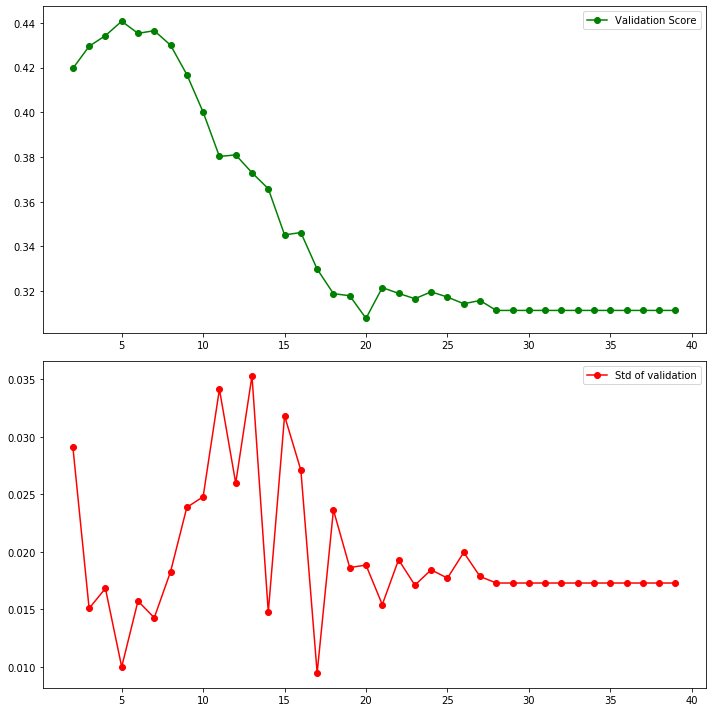

In [33]:
decision_tree(x_train, y_train, range(2,40))

In [34]:
dt_pred_train, dt_pred_test = Model_Prediction(x_train, y_train, x_test, y_test, model= DecisionTreeClassifier(max_depth=5, class_weight='balanced'), mtype='dt')

Training f1 score: 0.4997470915528578
Testing f1 score: 0.44155844155844154
	
Classification Report for test data:
              precision    recall  f1-score   support

           0       0.72      0.86      0.78       714
           1       0.57      0.36      0.44       378

    accuracy                           0.68      1092
   macro avg       0.64      0.61      0.61      1092
weighted avg       0.67      0.68      0.66      1092



### Decision Tree(with max depth and min sample split)

In [35]:
param_grid= {'max_depth':[4,5,6,7,8], 'min_samples_split': [i for i in range(25,275, 25)],
             'min_samples_leaf':[i for i in range(12,150, 12)]}

dtc = DecisionTreeClassifier(class_weight='balanced')

x_train_selected = x_train[top_features]
x_test_selected = x_test[top_features]

grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, scoring='f1', cv=StratifiedKFold(), n_jobs=-1, verbose=1).fit(x_train, y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 1576 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 2476 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  1.3min finished


In [36]:
grid_search.best_score_, grid_search.best_estimator_

(0.4545685104785203,
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                        max_depth=8, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=12, min_samples_split=50,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'))

In [37]:
dt_pred_train, dt_pred_test = Model_Prediction(x_train_selected, y_train, x_test_selected, y_test,\
                                               model=DecisionTreeClassifier(max_depth=5, min_samples_split=50,\
                                              min_samples_leaf=12, class_weight='balanced'),mtype='dt')

Training f1 score: 0.498960498960499
Testing f1 score: 0.44073455759599334
	
Classification Report for test data:
              precision    recall  f1-score   support

           0       0.73      0.85      0.79       731
           1       0.55      0.37      0.44       361

    accuracy                           0.69      1092
   macro avg       0.64      0.61      0.61      1092
weighted avg       0.67      0.69      0.67      1092



### Precesion Recall Curve

In [ ]:
#Getting probability values for train and test 
logreg = DecisionTreeClassifier(max_depth=5, min_samples_split=50,\
                                              min_samples_leaf=12, class_weight='balanced')
logreg.fit(x_train_selected, y_train)
prob_train = logreg.predict_proba(x_train_selected)
prob_test = logreg.predict_proba(x_test_selected)

In [ ]:
#Values for precision, recall and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, prob_test[:,1])

#Ploting precision-recall curve
plt.figure(figsize=(6,5), dpi=100)
sns.set_style('whitegrid')
plt.plot(thresholds, precision[:-1], color='green', label='Precision Curve')
plt.plot(thresholds, recall[:-1], color='orange', label='Recall Curve')
plt.xlabel('Threshold Points')
plt.ylabel('F1-Score')
plt.title('Precision-Recall tradeoff')
plt.legend()

### ROC-AUC Score

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, prob_test[:,1])
auc_knn = auc(fpr, tpr)

plt.figure(figsize=(6, 5), dpi=100)
plt.plot(fpr, tpr, marker='.', label='Decision Tree (auc = %0.3f)' % auc_knn)
plt.plot([0,1], [0,1], label= 'baseline', color= 'red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')

plt.legend()

## Support Vector Machine

### SVM(with linear kernal)

In [38]:
svm_pred_train, svm_pred_test = Model_Prediction(x_train, y_train, x_test, y_test, model=SVC(kernel= 'linear'), mtype='svm')


Training f1 score: 0.016597510373443983
Testing f1 score: 0.008264462809917356
	
Classification Report for test data:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88      1088
           1       0.00      0.25      0.01         4

    accuracy                           0.78      1092
   macro avg       0.50      0.52      0.44      1092
weighted avg       0.99      0.78      0.87      1092



**Observartions:**
* The model is underfiiting as both train and test score is very low.
* We are getting 0 f1 score for class 1.
* Precision is also 0 and recall is only 0.25.
* On the contrary model is predicting very good for the class 1.
* As it is a class imbalance problem we might need to balance th weights so that model can capture patterns of minority class.


### SVM(with linear kernal and balanced classes)

In [39]:
svm_pred_train, svm_pred_test = Model_Prediction(x_train, y_train, x_test, y_test, model=SVC(kernel='linear', class_weight='balanced'), mtype='svm')

Training f1 score: 0.4768
Testing f1 score: 0.44112769485903813
	
Classification Report for test data:
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       727
           1       0.56      0.36      0.44       365

    accuracy                           0.69      1092
   macro avg       0.64      0.61      0.61      1092
weighted avg       0.67      0.69      0.67      1092



**Observations:**
* Both train and scores has been increased exponentially after balancing the weights for classes.
* Precision and recall score also has been increased.


**Using Top 30 features from decision tree**

In [40]:
x_train_selected = x_train[top_features]
x_test_selected = x_test[top_features]

In [41]:
svm_pred_train, svm_pred_test =Model_Prediction(x_train_selected, y_train, x_test_selected, y_test, model=SVC(kernel='linear', class_weight='balanced'), mtype='svm')

Training f1 score: 0.44241119483315394
Testing f1 score: 0.43986254295532645
	
Classification Report for test data:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       748
           1       0.54      0.37      0.44       344

    accuracy                           0.70      1092
   macro avg       0.64      0.61      0.62      1092
weighted avg       0.68      0.70      0.68      1092



In [42]:
param_grid = {'C': [0.001,0.1,1.0,10,20, 100], 'gamma': [0.001,0.1,1.0,10,20,100]}

In [43]:
svc = SVC(class_weight='balanced', kernel='linear')
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=StratifiedKFold(n_splits=4), scoring='f1', n_jobs=-1).fit(x_train_selected, y_train)

In [44]:
grid_search.best_score_

0.43982056388296814

In [45]:
grid_search.best_params_

{'C': 0.001, 'gamma': 0.001}

In [46]:
svc = SVC(class_weight='balanced', kernel='rbf')
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=StratifiedKFold(n_splits=4), scoring='f1', n_jobs=-1).fit(x_train_selected, y_train)

In [48]:
grid_search.best_score_, grid_search.best_params_


(0.4457183918938438, {'C': 10, 'gamma': 0.001})

In [50]:
svm_pred_train, svm_pred_test =Model_Prediction(x_train_selected, y_train, x_test_selected, y_test, model=SVC(kernel='rbf', class_weight='balanced', C=10, gamma=0.001), mtype='svm')

Training f1 score: 0.4611923509561304
Testing f1 score: 0.4444444444444445
	
Classification Report for test data:
              precision    recall  f1-score   support

           0       0.76      0.85      0.81       763
           1       0.53      0.38      0.44       329

    accuracy                           0.71      1092
   macro avg       0.65      0.62      0.62      1092
weighted avg       0.69      0.71      0.70      1092



## Ensemble Models

### Max Voting:
For max voting we going to take 4 models i.e.
1. Logestic Regression
2. KNN Classifier 
3. Decision Tree Classification
4. SVM Classifier

#### Logistic Regression Model

In [ ]:
model1 = LogisticRegression(class_weight='balanced', penalty='l1', C=1, solver='liblinear')
model1.fit(x_train_selected, y_train)
pred1= model1.predict(x_test_selected)
pred1[:10], f1_score(y_test, pred1)

#### KNN Classifier Model

In [ ]:
model2 = KNeighborsClassifier(n_neighbors=24)
model2.fit(x_train_selected, y_train)
pred2= model2.predict(x_test_selected)
pred2[:10], f1_score(y_test, pred2)

#### Decision Tree Model

In [ ]:
model3 = DecisionTreeClassifier(max_depth=5, min_samples_split=50, min_samples_leaf=12, class_weight='balanced')
model3.fit(x_train_selected, y_train)
pred3= model3.predict(x_test_selected)
pred3[:10], f1_score(y_test, pred3)

#### SVM Classifier Model

In [ ]:
model4 = SVC(kernel='linear', class_weight='balanced')
model4.fit(x_train_selected, y_train)
pred4= model4.predict(x_test_selected)
pred4[:10], f1_score(y_test, pred4)

#### Evaluating model performance using all the models

In [ ]:
from statistics import mode
final_pred = np.array([])
for i in range(0,len(x_test)):
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i], pred4[i], pred1[i], pred3[i], pred4[i]]))

In [ ]:
f1_score(y_test, final_pred)

### Stacking: 

In [ ]:
#Creating a New train dataframe
train_prediction = {
              'LR': lr_train_pred,
              'DT': dt_pred_train,
              'knn': knn_pred_train,
              'svm': svm_pred_train
            }
train_predictions = pd.DataFrame(train_prediction)
train_predictions.head()

In [ ]:
#Creating a New test dataframe
test_prediction = {
              'LR': lr_test_pred,
              'DT': dt_pred_test,
              'knn': knn_pred_test,
              'svm': svm_pred_test
            }
test_predictions = pd.DataFrame(test_prediction)
test_predictions.head()

In [ ]:
# Stacker knn Model
model = KNeighborsClassifier()
model.fit(train_predictions, y_train)
stack_pred_test = model.predict(test_predictions)
f1_score(stack_pred_test,y_test)

In [ ]:
# Stacker logistic regression Model
model = LogisticRegression(class_weight='balanced')
model.fit(train_predictions, y_train)
stack_pred_test = model.predict(test_predictions)
f1_score(stack_pred_test,y_test)

### Stacking with StratifiedKFolds

In [ ]:
from sklearn.model_selection import StratifiedKFold

def kfold_predictions( model , n_splits , train_x , train_y, test_x ):
    ## Initializing empty Numpy Arrays
    train_pred = np.empty((0,0) , int)
    skfold = StratifiedKFold(n_splits, random_state = 9)
  
    #For every permutation of KFold
    for i,j in skfold.split(train_x, train_y):
        x_train, x_test = train_x.iloc[i], train_x.iloc[j]
        y_train, y_test = train_y.iloc[i], train_y.iloc[j]
    
        #Train a model on training set
        model.fit( X = x_train, y = y_train)
    
        #Predict on Chosen Group
        tmp = model.predict(x_test)
    
        #Storing train predictions
        train_pred = np.append(train_pred, tmp)
    
    #Training on complete data and generating Predictionson Test set
    model.fit(train_x, train_y)
    test_pred = model.predict(test_x)
  
    return train_pred, test_pred

#### Logestic Regression

In [ ]:
LR = LogisticRegression(class_weight='balanced', penalty='l1', C=1, solver='liblinear')
M1_train, M1_test = kfold_predictions( LR, 10, x_train_selected, y_train, x_test_selected) 

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=24)
M2_train, M2_test = kfold_predictions(KNN, 10, x_train_selected, y_train, x_test_selected) 

In [ ]:
DT = DecisionTreeClassifier(max_depth=5, min_samples_split=50, min_samples_leaf=12, class_weight='balanced')
M3_train, M3_test = kfold_predictions(DT, 10, x_train_selected, y_train, x_test_selected) 

In [ ]:
SVM = SVC(kernel='linear', class_weight='balanced')
M4_train, M4_test = kfold_predictions(SVM, 10, x_train_selected, y_train, x_test_selected) 

## Data Blending

In [52]:
def blending(model, x_train, y_train, x_test):
    #train validation split
    train_x, valid_x, train_y, valid_y = train_test_split(x_train, y_train, random_state=101)
    
    #fit on training
    model.fit(train_x, train_y)
    
    #predict on validation and test
    valid_pred = model.predict(valid_x)
    score= f1_score(valid_y, valid_pred)
    print('Validation Score', score)
    
    test_pred=model.predict(x_test)
    #return validation pred, test pred
    return valid_pred, valid_y, test_pred

In [65]:
#Model1 = Logistic Regression
LR=LogisticRegression(class_weight='balanced', penalty='l1', C=1, solver='liblinear')
M1_valid, M1_target, M1_test = blending(LR, x_train_selected, y_train, x_test_selected)

Validation Score 0.42677824267782427


In [66]:
#Model 2= Decision Tree
DT=DecisionTreeClassifier(max_depth=5, min_samples_split=50, min_samples_leaf=12, class_weight='balanced')
M2_valid, M2_target, M2_test = blending(DT, x_train, y_train, x_test)

Validation Score 0.4269662921348315


In [67]:
#Model 3 = K Nearest Neighbour
knn=KNeighborsClassifier(n_neighbors=24)
M3_valid, M3_target, M3_test = blending(knn, x_train, y_train, x_test)

Validation Score 0.1683168316831683


In [68]:
#Model 4 = Support Vector Machine
svc= SVC(kernel='linear', class_weight='balanced')
M4_valid, M4_target, M4_test = blending(svc, x_train, y_train, x_test)

Validation Score 0.42411642411642414


In [71]:
valid_prediction = {
              'LR': M1_valid,
              'DT': M2_valid,
              #'knn': M3_valid,
              'svm': M4_valid
              }
new_train = pd.DataFrame(valid_prediction)
new_train.head()

,LR,DT,svm
0,1,1,1
1,0,0,0
2,1,1,1
3,0,0,1
4,0,0,0


In [72]:
test_prediction = {
              'LR': M1_test,
              'DT': M2_test,
              #'knn': M3_test,
              'svm': M4_test
              }
new_test = pd.DataFrame(test_prediction)
new_test.head()

,LR,DT,svm
0,1,1,1
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0


In [73]:
# Final Model knn
model1 = KNeighborsClassifier()
model1.fit(new_train, M1_target)
final_pred = model1.predict(new_test)
f1_score(y_test, final_pred)

0.4116331096196868

In [74]:
# Final Model logistic regression
model2 = LogisticRegression(class_weight='balanced')
model2.fit(new_train, M1_target)
final_pred = model2.predict(new_test)
f1_score(y_test, final_pred)

0.4296296296296296

## Gradiant Boosting 

### GB(with default parameters)

In [37]:
pred_train, pred_test = Model_Prediction(x_train,y_train,x_test,y_test, model=GradientBoostingClassifier(random_state=101), mtype='gb')

Training f1 score: 0.4882352941176471
Testing f1 score: 0.32432432432432434
	
Classification Report for test data:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       997
           1       0.23      0.57      0.32        95

    accuracy                           0.79      1092
   macro avg       0.59      0.69      0.60      1092
weighted avg       0.89      0.79      0.83      1092



* Model is overfitting 

#### Tuning max_depth  

In [23]:
from sklearn.model_selection import StratifiedKFold

def parameter_optimizer(x, y, par_range, cv=5):
    
    mean_f1 = []
    std_f1 = []
    
    for i in par_range:
        
        model = GradientBoostingClassifier(max_depth=i)
        score = cross_val_score(estimator=model, X=x, y=y, cv=StratifiedKFold(n_splits=cv), n_jobs=-1, scoring='f1', verbose=2)
        mean_f1.append(score.mean())
        std_f1.append(score.std())
        
    # Ploting for f1_scores 
    plt.rcParams['figure.figsize'] = (10, 10)
    plt.subplot(2,1,1)
    plt.plot(par_range,mean_f1, label='Validation Score', color='green', marker='o')
    plt.xticks()
    plt.legend()
    
    plt.subplot(2,1,2)
    plt.plot(par_range, std_f1, label='Std of validation', color='red', marker='o')
    plt.xticks()  
    plt.legend()
    plt.tight_layout()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5

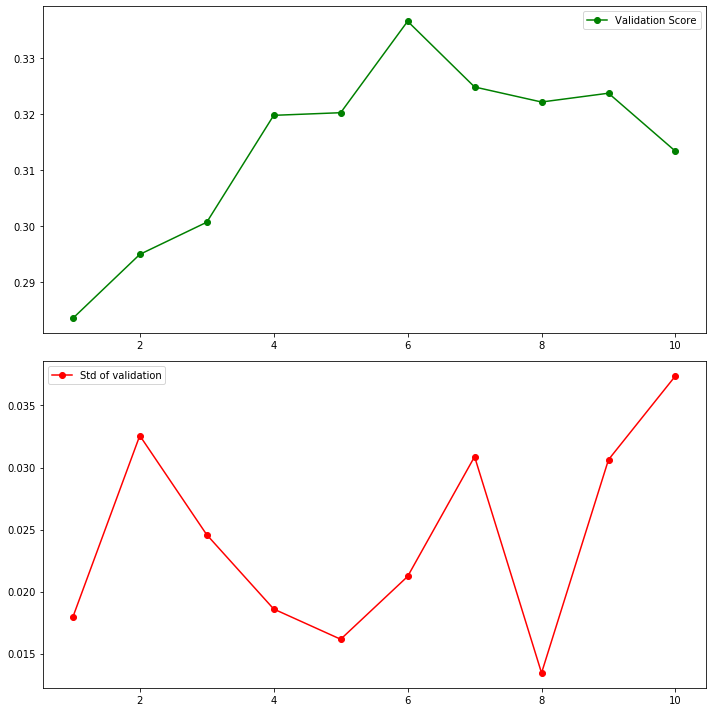

In [24]:
parameter_optimizer(x_train, y_train, range(1,11))       

In [39]:
from sklearn.model_selection import StratifiedKFold

def parameter_optimizer(x, y, par_range, cv=5):
    
    mean_f1 = []
    std_f1 = []
    
    for i in par_range:
        
        model = GradientBoostingClassifier(max_depth=6, n_estimators=i)
        score = cross_val_score(estimator=model, X=x, y=y, cv=StratifiedKFold(n_splits=cv), n_jobs=-1, scoring='f1', verbose=2)
        mean_f1.append(score.mean())
        std_f1.append(score.std())
        
    # Ploting for f1_scores 
    plt.rcParams['figure.figsize'] = (10, 10)
    plt.subplot(2,1,1)
    plt.plot(par_range,mean_f1, label='Validation Score', color='green', marker='o')
    plt.xticks()
    plt.legend()
    
    plt.subplot(2,1,2)
    plt.plot(par_range, std_f1, label='Std of validation', color='red', marker='o')
    plt.xticks()  
    plt.legend()
    plt.tight_layout()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5

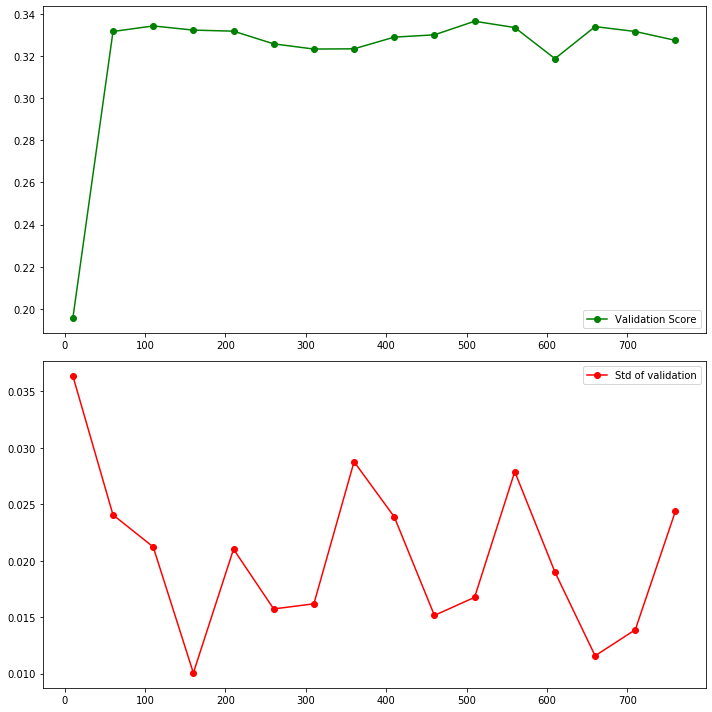

In [40]:
parameter_optimizer(x_train, y_train, range(10,800,50))

In [42]:
pred_train, pred_test = Model_Prediction(x_train, y_train, x_test, y_test, model=GradientBoostingClassifier(max_depth=6, n_estimators=160), mtype='gb')

Training f1 score: 0.9190007570022709
Testing f1 score: 0.31908831908831914
	
Classification Report for test data:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       979
           1       0.24      0.50      0.32       113

    accuracy                           0.78      1092
   macro avg       0.58      0.65      0.59      1092
weighted avg       0.86      0.78      0.81      1092



In [27]:
from sklearn.model_selection import StratifiedKFold

def parameter_optimizer(x, y, par_range, cv=5):
    
    mean_f1 = []
    std_f1 = []
    
    for i in par_range:
        
        model = GradientBoostingClassifier(max_depth=6, n_estimators=225, learning_rate=i)
        score = cross_val_score(estimator=model, X=x, y=y, cv=StratifiedKFold(n_splits=cv), n_jobs=-1, scoring='f1', verbose=2)
        mean_f1.append(score.mean())
        std_f1.append(score.std())
        
    # Ploting for f1_scores 
    plt.rcParams['figure.figsize'] = (10, 10)
    plt.subplot(2,1,1)
    plt.plot(par_range,mean_f1, label='Validation Score', color='green', marker='o')
    plt.xticks()
    plt.legend()
    
    plt.subplot(2,1,2)
    plt.plot(par_range, std_f1, label='Std of validation', color='red', marker='o')
    plt.xticks()  
    plt.legend()
    plt.tight_layout()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5

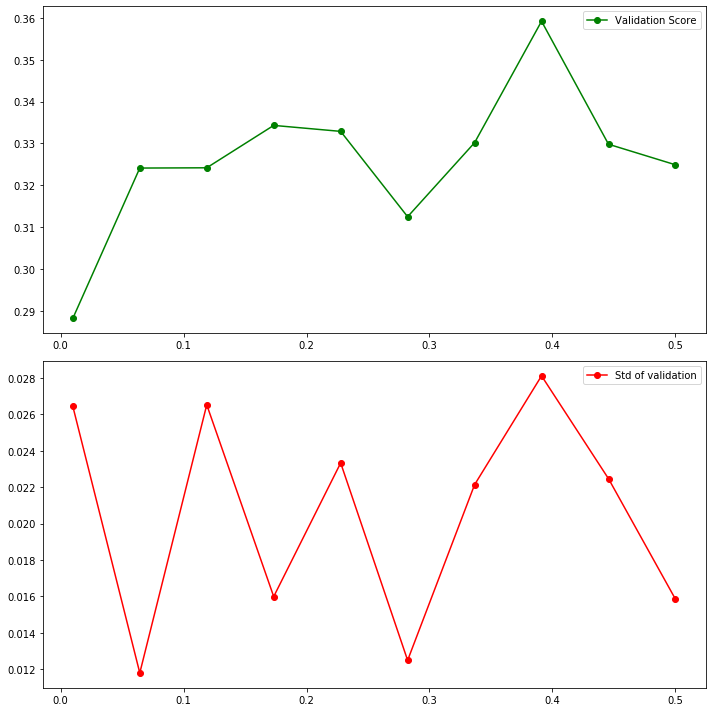

In [33]:
parameter_optimizer(x_train, y_train, par_range=np.linspace(0.01,0.5,10))

In [35]:

    def parameter_optimizer(x, y, par_range, model, cv=5):
        
        mean_f1 = []
        std_f1 = []
        
        for i in par_range:
            
            model = model 
            score = cross_val_score(estimator=model, X=x, y=y, cv=StratifiedKFold(n_splits=cv), n_jobs=-1, scoring='f1', verbose=2)
            mean_f1.append(score.mean())
            std_f1.append(score.std())
            
        # Ploting for mean f1_scores 
        plt.rcParams['figure.figsize'] = (10, 10)
        plt.subplot(2,1,1)
        plt.plot(par_range,mean_f1, label='Validation Score', color='green', marker='o')
        plt.xticks()
        plt.legend()
        
        #Ploting std for the cv scores
        plt.subplot(2,1,2)
        plt.plot(par_range, std_f1, label='Std of validation', color='red', marker='o')
        plt.xticks()  
        plt.legend()
        plt.tight_layout()




[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5

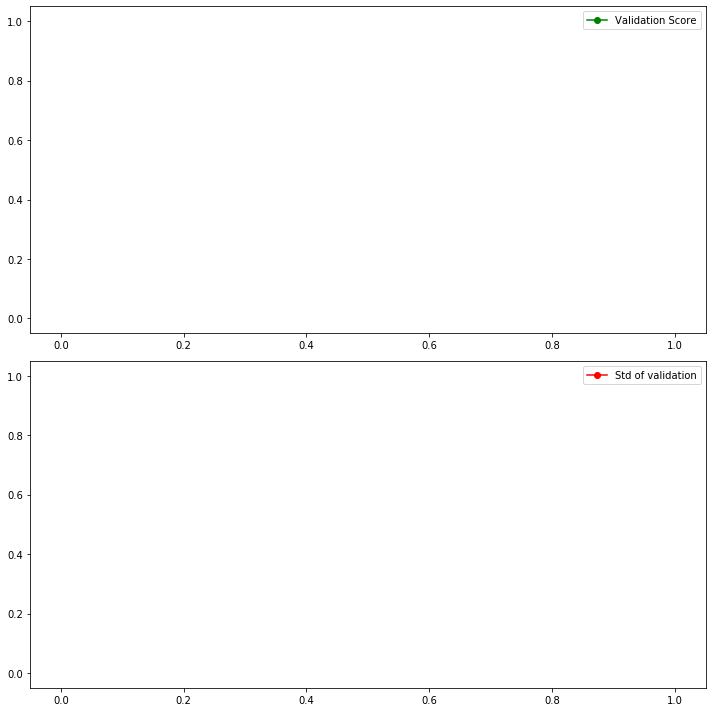

In [36]:
parameter_optimizer(x_train, y_train, range(1,11), GradientBoostingClassifier(max_depth=i))

## Bagging Model

### 1. Bagging Decision Trees(with default parameters)

In [61]:
pred_train, pred_test, bc_dt= Model_Prediction(x_train, y_train, x_test, y_test, 
                                             model=BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=101)),
                                             mtype='bc')

Training f1 score: 0.9502923976608186
Testing f1 score: 0.26506024096385544
	
Classification Report for test data:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       998
           1       0.18      0.47      0.27        94

    accuracy                           0.78      1092
   macro avg       0.56      0.64      0.57      1092
weighted avg       0.88      0.78      0.82      1092



* Model is performing exeptionally well on the training the data but is working very badly on test data in other words model is overfitting. 

In [114]:
param_grid = {'n_estimators': [int(round(i)) for i in np.linspace(50,1000,50)],
              'max_samples': [0.8,0.9,1.0],
              'max_features': [0.2,0.4,0.6,0.8,1.0],
              'bootstrap':[True,False],
              'bootstrap_features':[True,False]}

dt = DecisionTreeClassifier(random_state=101, class_weight='balanced')
bc_dt = BaggingClassifier(random_state=101, base_estimator=dt)

In [115]:
rsearch = RandomizedSearchCV(estimator=bc_dt, n_iter=50, cv=StratifiedKFold(n_splits=5), 
                             n_jobs=-1, verbose=2, param_distributions=param_grid, 
                             random_state=101, scoring='f1').fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 46.4min finished


In [120]:
pd.DataFrame(rsearch.cv_results_).sort_values(by=['mean_test_score','std_test_score'], ascending=[False,True]).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_samples,param_max_features,param_bootstrap_features,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
23,20.592133,0.503173,0.368812,0.025444,709,1,0.2,True,False,"{'n_estimators': 709, 'max_samples': 1.0, 'max...",0.309859,0.303665,0.299517,0.311321,0.301887,0.305250,0.004578,1
38,61.656499,1.826477,0.441616,0.070683,399,0.9,0.8,False,False,"{'n_estimators': 399, 'max_samples': 0.9, 'max...",0.355769,0.313131,0.291457,0.284360,0.278846,0.304713,0.028059,2
13,51.708541,8.926066,0.427832,0.061946,535,1,0.6,False,False,"{'n_estimators': 535, 'max_samples': 1.0, 'max...",0.374384,0.306931,0.256410,0.301887,0.277512,0.303425,0.039829,3
28,77.847671,10.544647,0.463537,0.095307,418,1,1,True,False,"{'n_estimators': 418, 'max_samples': 1.0, 'max...",0.360976,0.295567,0.290000,0.284360,0.272300,0.300641,0.031137,4
24,5.720684,0.165857,0.045276,0.002326,69,0.8,0.8,True,False,"{'n_estimators': 69, 'max_samples': 0.8, 'max_...",0.331707,0.285714,0.278351,0.271845,0.325359,0.298595,0.024916,5


In [133]:
rsearch.best_estimator_


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight='balanced',
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=

Training f1 score: 0.0
Testing f1 score: 0.0
	
Classification Report for test data:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88      1092
           1       0.00      0.00      0.00         0

    accuracy                           0.78      1092
   macro avg       0.50      0.39      0.44      1092
weighted avg       1.00      0.78      0.88      1092



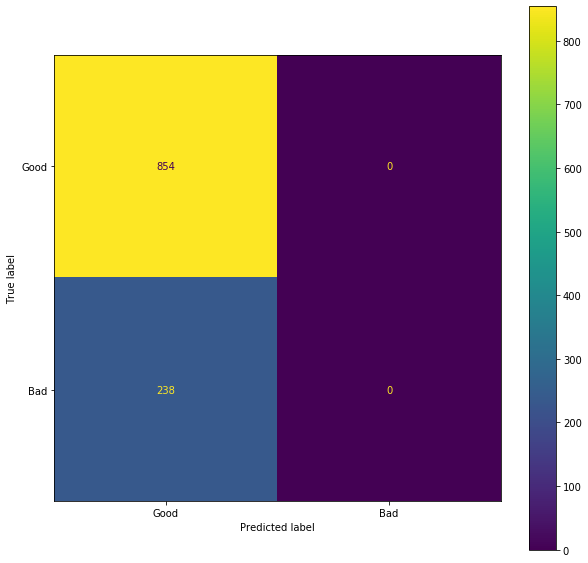

In [130]:
pred_train, pred_test, bc_dt = Model_Prediction(x_train, y_train, x_test, y_test, 
                                                BaggingClassifier(base_estimator= DecisionTreeClassifier(random_state=101, class_weight='balanced'),
                                                                                            n_estimators=709,
                                                                                            max_samples=1,
                                                                                            max_features=0.2,
                                                                                            bootstrap_features=True,
                                                                                            bootstrap=False),
                                        con_mat=True)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

## Random Forest Model

In [137]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(random_state=101, class_weight='balanced')
pred_train, pred_test, rf = Model_Prediction(x_train, y_train, x_test, y_test, rfm)

Training f1 score: 1.0
Testing f1 score: 0.30624999999999997
	
Classification Report for test data:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      1010
           1       0.21      0.60      0.31        82

    accuracy                           0.80      1092
   macro avg       0.58      0.71      0.59      1092
weighted avg       0.90      0.80      0.84      1092



In [140]:
from sklearn.model_selection import StratifiedKFold

def parameter_optimizer(x, y, par_range, cv=5):
    
    mean_f1 = []
    std_f1 = []
    
    for i in par_range:
        
        model = RandomForestClassifier(max_depth=i, random_state=101, class_weight='balanced')
        score = cross_val_score(estimator=model, X=x, y=y, cv=StratifiedKFold(n_splits=cv), n_jobs=-1, scoring='f1', verbose=2)
        mean_f1.append(score.mean())
        std_f1.append(score.std())
        
    # Ploting for f1_scores 
    plt.rcParams['figure.figsize'] = (10, 10)
    plt.subplot(2,1,1)
    plt.plot(par_range,mean_f1, label='Validation Score', color='green', marker='o')
    plt.xticks()
    plt.legend()
    
    plt.subplot(2,1,2)
    plt.plot(par_range, std_f1, label='Std of validation', color='red', marker='o')
    plt.xticks()  
    plt.legend()
    plt.tight_layout()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5

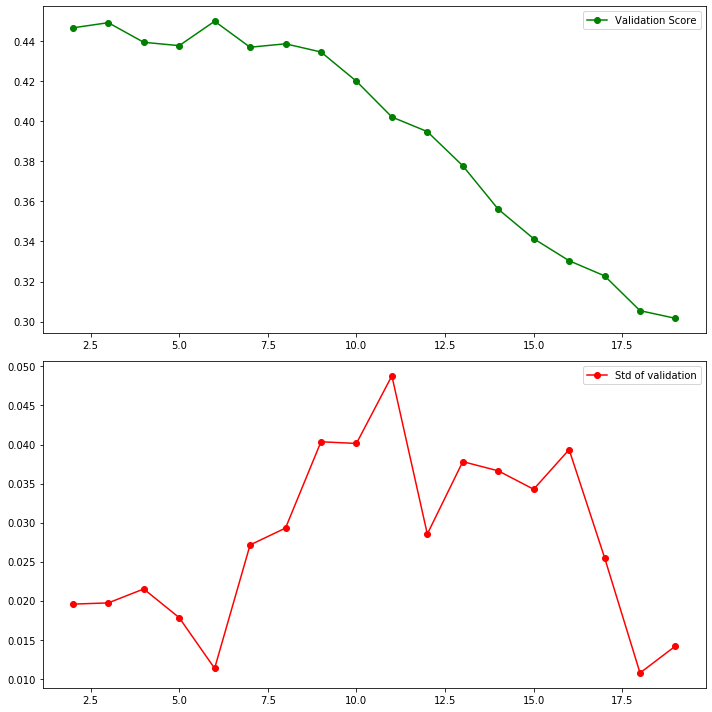

In [141]:
parameter_optimizer(x_train, y_train, par_range=range(2,20))

In [145]:
rfm = RandomForestClassifier(random_state=101, class_weight='balanced', max_depth=7)
pred_train, pred_test, rf = Model_Prediction(x_train, y_train, x_test, y_test, rfm)

Training f1 score: 0.6
Testing f1 score: 0.4260869565217391
	
Classification Report for test data:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       870
           1       0.41      0.44      0.43       222

    accuracy                           0.76      1092
   macro avg       0.63      0.64      0.64      1092
weighted avg       0.76      0.76      0.76      1092



In [146]:
from sklearn.model_selection import StratifiedKFold

def parameter_optimizer(x, y, par_range, cv=5):
    
    mean_f1 = []
    std_f1 = []
    
    for i in par_range:
        
        model = RandomForestClassifier(max_depth=7, random_state=101, class_weight='balanced', n_estimators=i)
        score = cross_val_score(estimator=model, X=x, y=y, cv=StratifiedKFold(n_splits=cv), n_jobs=-1, scoring='f1', verbose=2)
        mean_f1.append(score.mean())
        std_f1.append(score.std())
        
    # Ploting for f1_scores 
    plt.rcParams['figure.figsize'] = (10, 10)
    plt.subplot(2,1,1)
    plt.plot(par_range,mean_f1, label='Validation Score', color='green', marker='o')
    plt.xticks()
    plt.legend()
    
    plt.subplot(2,1,2)
    plt.plot(par_range, std_f1, label='Std of validation', color='red', marker='o')
    plt.xticks()  
    plt.legend()
    plt.tight_layout()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5

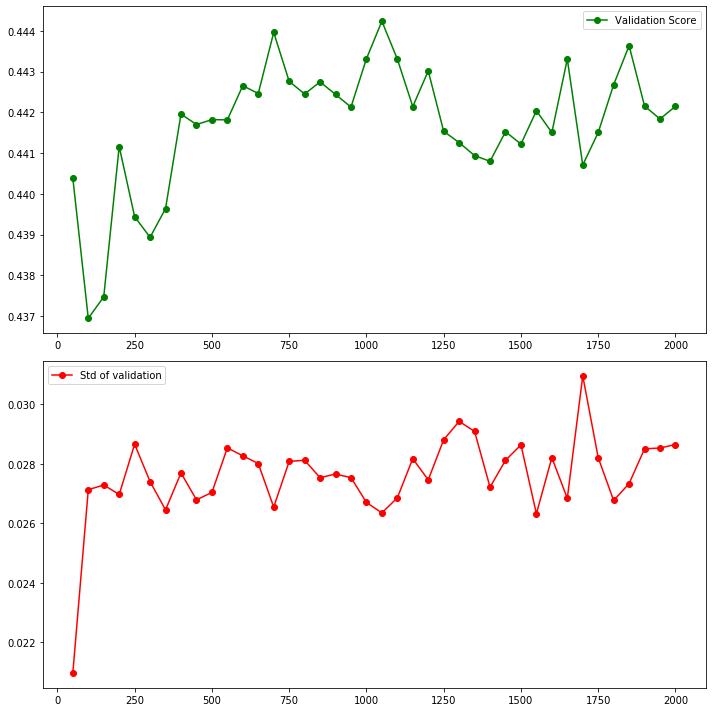

In [147]:
parameter_optimizer(x_train, y_train, range(50, 2001, 50))

In [150]:
rfm = RandomForestClassifier(random_state=101, class_weight='balanced', max_depth=7,n_estimators=1100)
pred_train, pred_test, rf = Model_Prediction(x_train, y_train, x_test, y_test, rfm)

Training f1 score: 0.6050870147255689
Testing f1 score: 0.4329004329004329
	
Classification Report for test data:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       868
           1       0.42      0.45      0.43       224

    accuracy                           0.76      1092
   macro avg       0.64      0.64      0.64      1092
weighted avg       0.77      0.76      0.76      1092



In [151]:
param_grid = {'n_estimators': [int(round(i)) for i in np.linspace(50,2500,100)],
              'criterion': ['gini', 'entropy'],
              'max_depth': [i for i in range(2,10)],
              'min_samples_split': [i for i in range(25,1000, 25)],
              'min_samples_leaf': [i for i in range(12,500, 15)],
              'max_features': ['auto', 'sqrt', 'log2'],
              'bootstrap': [True, False]
}

In [152]:
rf = RandomForestClassifier(random_state=101, class_weight='balanced')
rsearch_rf = RandomizedSearchCV(estimator=rf, n_iter=100, cv=StratifiedKFold(n_splits=5), 
                             n_jobs=-1, verbose=2, param_distributions=param_grid, 
                             random_state=101, scoring='f1').fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 13.5min finished


In [153]:
rsearch_rf.best_score_

0.45918583406490165

In [188]:
eval_data = pd.DataFrame(rsearch_rf.cv_results_).sort_values(by=['std_test_score'],
                                                 ascending=True).reset_index(drop=True)
eval_data.head(7)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.208199,0.107417,0.285836,0.023008,916,300,57,log2,4,entropy,True,"{'n_estimators': 916, 'min_samples_split': 300...",0.477612,0.437870,0.452012,0.439759,0.448598,0.451170,0.014238,15
1,10.931169,0.152050,0.556512,0.011301,2401,375,87,log2,5,gini,False,"{'n_estimators': 2401, 'min_samples_split': 37...",0.479290,0.435028,0.452381,0.448276,0.447059,0.452407,0.014631,8
2,8.914960,0.142082,0.505249,0.019387,2327,975,12,log2,4,gini,True,"{'n_estimators': 2327, 'min_samples_split': 97...",0.477876,0.439169,0.455090,0.439024,0.438272,0.449886,0.015351,23
3,9.790619,0.167263,0.485103,0.064704,1312,350,177,log2,6,entropy,False,"{'n_estimators': 1312, 'min_samples_split': 35...",0.475921,0.443243,0.457971,0.430168,0.445104,0.450481,0.015474,20
4,6.138785,0.206583,0.289626,0.014693,867,425,147,log2,5,entropy,False,"{'n_estimators': 867, 'min_samples_split': 425...",0.469565,0.441989,0.470930,0.435530,0.439169,0.451437,0.015501,13
5,3.923109,0.059562,0.206648,0.014513,792,275,132,log2,9,gini,False,"{'n_estimators': 792, 'min_samples_split': 275...",0.477778,0.446866,0.463768,0.435754,0.441176,0.453069,0.015522,6
6,5.716912,0.109224,0.300398,0.012979,1263,550,132,log2,6,gini,False,"{'n_estimators': 1263, 'min_samples_split': 55...",0.479769,0.444444,0.475645,0.441261,0.454810,0.459186,0.015826,1


In [192]:
eval_data.iloc[6,:]

mean_fit_time                                                        5.71691
std_fit_time                                                        0.109224
mean_score_time                                                     0.300398
std_score_time                                                     0.0129793
param_n_estimators                                                      1263
param_min_samples_split                                                  550
param_min_samples_leaf                                                   132
param_max_features                                                      log2
param_max_depth                                                            6
param_criterion                                                         gini
param_bootstrap                                                        False
params                     {'n_estimators': 1263, 'min_samples_split': 55...
split0_test_score                                                   0.479769

In [194]:
rfm = RandomForestClassifier(random_state=101, n_estimators = 1263,
 min_samples_split = 550,
 min_samples_leaf =  132,
 max_features = 'log2',
 max_depth = 6,
 criterion ='gini',
 bootstrap = False, class_weight='balanced')
pred_train, pred_test, rf = Model_Prediction(x_train, y_train, x_test, y_test, rfm)

Training f1 score: 0.47165532879818595
Testing f1 score: 0.42391304347826086
	
Classification Report for test data:
              precision    recall  f1-score   support

           0       0.77      0.84      0.81       778
           1       0.49      0.37      0.42       314

    accuracy                           0.71      1092
   macro avg       0.63      0.61      0.61      1092
weighted avg       0.69      0.71      0.70      1092



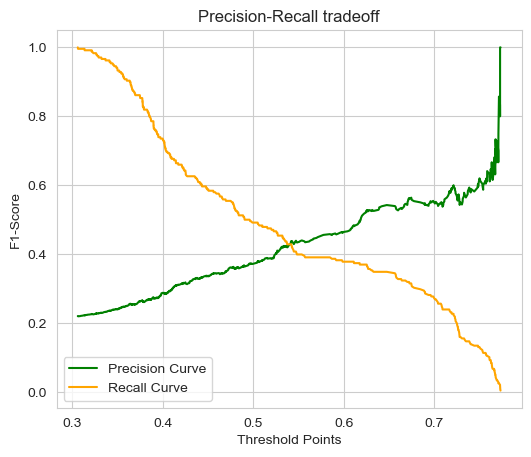

In [195]:
prob_test = rf.predict_proba(x_test)

#Values for precision, recall and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, prob_test[:,1])

#Ploting precision-recall curve
plt.figure(figsize=(6,5), dpi=100)
sns.set_style('whitegrid')
plt.plot(thresholds, precision[:-1], color='green', label='Precision Curve')
plt.plot(thresholds, recall[:-1], color='orange', label='Recall Curve')
plt.xlabel('Threshold Points')
plt.ylabel('F1-Score')
plt.title('Precision-Recall tradeoff')
plt.legend()


Training f1 score: 0.4736490993995997
Testing f1 score: 0.42857142857142855
	
Classification Report for test data:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       854
           1       0.43      0.43      0.43       238

    accuracy                           0.75      1092
   macro avg       0.63      0.63      0.63      1092
weighted avg       0.75      0.75      0.75      1092



<Figure size 144x144 with 0 Axes>

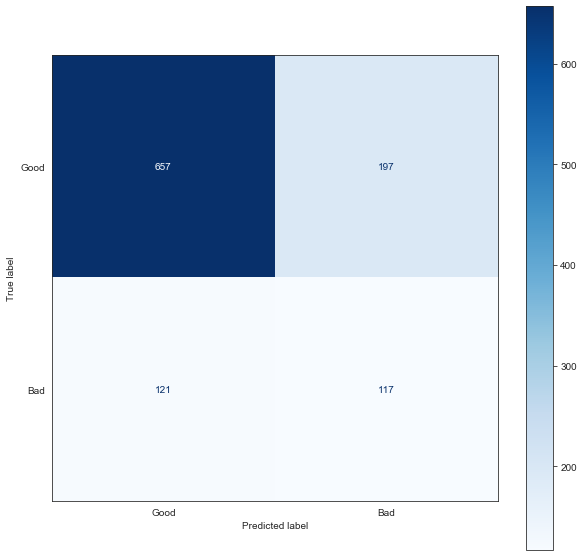

In [211]:
rfm = RandomForestClassifier(random_state=101, n_estimators = 1263,
 min_samples_split = 550,
 min_samples_leaf =  132,
 max_features = 'log2',
 max_depth = 6,
 criterion ='gini',
 bootstrap = False, class_weight='balanced')
pred_train, pred_test, rf = Model_Prediction(x_train, y_train, x_test, y_test, rfm, thresh=0.54, con_mat=True)

In [175]:
rsearch_cw = RandomizedSearchCV(estimator=rfm, param_distributions={'class_weight':[{0:i, 1:1.0-i} for i in np.linspace(0,1,100)]},
                                n_iter=100, n_jobs=-1, verbose=2, scoring='f1', cv=StratifiedKFold(n_splits=5)).fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 16.6min finished


In [202]:
eval_data = pd.DataFrame(rsearch_cw.cv_results_).sort_values(by=['mean_test_score'],
                                                 ascending=False).reset_index(drop=True)
eval_data.head(7)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.625404,0.059394,0.363804,0.022637,"{0: 0.21212121212121213, 1: 0.7878787878787878}","{'class_weight': {0: 0.21212121212121213, 1: 0...",0.481994,0.439791,0.462396,0.433333,0.450867,0.453676,0.017277,1
1,6.628587,0.128076,0.354615,0.021551,"{0: 0.22222222222222224, 1: 0.7777777777777778}","{'class_weight': {0: 0.22222222222222224, 1: 0...",0.476471,0.440678,0.472303,0.428986,0.443787,0.452445,0.018630,2
2,6.534168,0.075997,0.359015,0.039904,"{0: 0.24242424242424243, 1: 0.7575757575757576}","{'class_weight': {0: 0.24242424242424243, 1: 0...",0.479233,0.443038,0.465116,0.425249,0.442308,0.450989,0.018965,3
3,6.638178,0.061674,0.346302,0.016108,"{0: 0.23232323232323235, 1: 0.7676767676767676}","{'class_weight': {0: 0.23232323232323235, 1: 0...",0.477341,0.431953,0.465409,0.439628,0.440367,0.450940,0.017359,4
4,6.515509,0.102164,0.337302,0.016380,"{0: 0.25252525252525254, 1: 0.7474747474747474}","{'class_weight': {0: 0.25252525252525254, 1: 0...",0.479452,0.445183,0.441281,0.418118,0.436242,0.444055,0.019978,5
5,6.672176,0.103129,0.343796,0.016923,"{0: 0.26262626262626265, 1: 0.7373737373737373}","{'class_weight': {0: 0.26262626262626265, 1: 0...",0.489510,0.458904,0.411765,0.421429,0.435986,0.443519,0.027946,6
6,6.582194,0.083213,0.356649,0.013894,"{0: 0.18181818181818182, 1: 0.8181818181818181}","{'class_weight': {0: 0.18181818181818182, 1: 0...",0.483871,0.421286,0.461538,0.399038,0.447174,0.442582,0.029782,7


In [177]:
rsearch_cw.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight={0: 0.21212121212121213,
                                     1: 0.7878787878787878},
                       criterion='gini', max_depth=6, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=132, min_samples_split=550,
                       min_weight_fraction_leaf=0.0, n_estimators=1263,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [179]:
rfm = RandomForestClassifier(random_state=101, n_estimators = 1263,
 min_samples_split = 550,
 min_samples_leaf =  132,
 max_features = 'log2',
 max_depth = 6,
 criterion ='gini',
 bootstrap = False, class_weight={0: 0.21212121212121213, 1: 0.7878787878787878})

pred_train, pred_test, rf = Model_Prediction(x_train, y_train, x_test, y_test, rfm)

Training f1 score: 0.4657079646017699
Testing f1 score: 0.4219858156028369
	
Classification Report for test data:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       766
           1       0.50      0.37      0.42       326

    accuracy                           0.70      1092
   macro avg       0.63      0.60      0.61      1092
weighted avg       0.68      0.70      0.69      1092



Training f1 score: 0.4736490993995997
Testing f1 score: 0.42857142857142855
	
Classification Report for test data:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       854
           1       0.43      0.43      0.43       238

    accuracy                           0.75      1092
   macro avg       0.63      0.63      0.63      1092
weighted avg       0.75      0.75      0.75      1092



<Figure size 144x144 with 0 Axes>

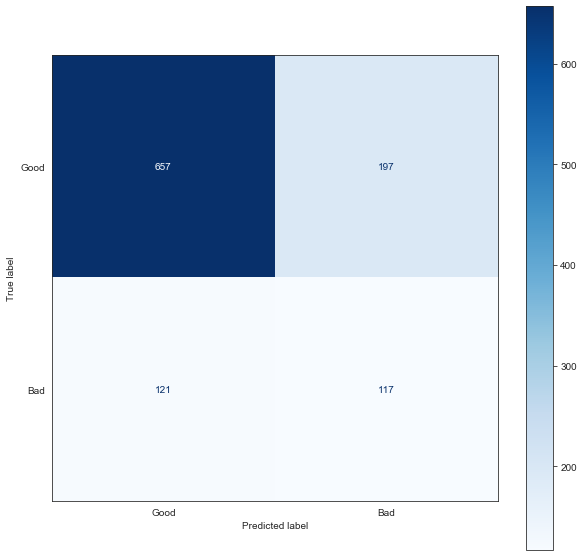

In [210]:
pred_train, pred_test, rf = Model_Prediction(x_train, y_train, x_test, y_test, rfm, thresh=0.54, con_mat=True)

## XGBoost 

### XGBoost(Default Parameters)

In [212]:
!pip install xgboost

In [214]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective='binary:logistic', seed=101)
x_train, y_train, xgb_mod = Model_Prediction(x_train, y_train, x_test, y_test, xgb)

Training f1 score: 0.9711815561959654
Testing f1 score: 0.3094555873925502
	
Classification Report for test data:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       981
           1       0.23      0.49      0.31       111

    accuracy                           0.78      1092
   macro avg       0.58      0.65      0.59      1092
weighted avg       0.86      0.78      0.81      1092

